#Passive Membrane Potential Simulations
The membrane of Neurons act like capacitors. Let's simulate how a passive membrane pontential changes as we inject current.

As always, let's import what we need

In [66]:
import numpy as np
from matplotlib import pyplot as plt
from math import exp

Initialize the [Tao](https://en.wikipedia.org/wiki/Time_constant), and set the rest membrane potential, and membrane resistant. The membrane is like an electric circuit after all.

In [76]:
tao = 10
u_rest = -50
R = 1

Define a function for membrane dynamics

In [77]:
def u(t, i, t_0=1000):
    return u_rest + R*i(t)*(1-exp(-1*(t-t_0)/tao))

Define simulation interval. And simulation program

In [110]:
duration = 1000 #1000 ms is 1 sec
dt = 1#simulation time step, 1 ms

def u_numsim(I, duration=1000, dt=0.1):
  """
  Numerical simulation of changes in passive membrane potential
  """
  U = [u_rest]
  T = [0]
  for t in np.arange(0, duration, step=dt):
    T.append(t)
    U.append(U[-1]+dt*(1/tao*(-U[-1]+u_rest+R*I(t))))
      
  return (T, U)

Run simulations for Time (T), Current (I) and Membrane Potential (U). First with no current injected. A little boring I know!.

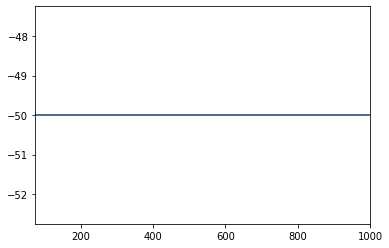

In [111]:
U = []
I = []
T = []
for t in np.arange(0, duration, step=1):
  T.append(t)
  I.append(u_rest)
  # U.append(u(t, lambda x: -50))

t, u_res = u_numsim(lambda x: 0, duration=duration, dt=dt)
plt.xlim([75, 1000])
plt.plot(t, u_res, color="red")
plt.plot(T, I)
plt.show()
    

Let's now inject a forever 10mV current

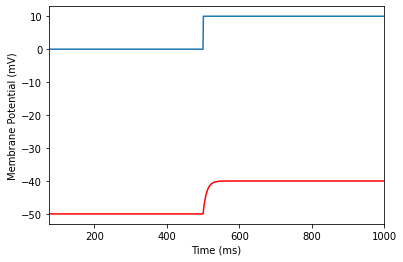

In [116]:
def step_current(t, lvl=10):
  if t <= duration/2:
    return 0
  else:
    return lvl
  
U = []
I = []
T = []
for t in np.arange(0, duration, step=1):
  T.append(t)
  I.append(step_current(t))

t, u_res = u_numsim(step_current, duration=duration, dt=dt)
plt.xlim([75, 1000])
plt.plot(t, u_res, color="red")
plt.plot(T, I)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.show()
    

Now, a step function to see the dynamic

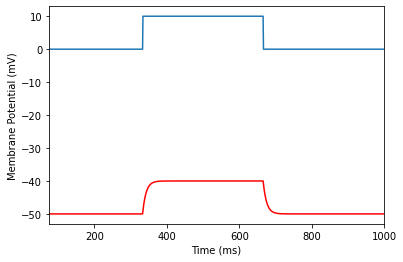

In [122]:
def pulse_current(t, lvl=10):
  """
  Injecting a step 10 mV current at 1/3 of the duration
  """
  if t <= duration/3:
    return 0
  elif t < duration*2/3:
    return lvl
  else:
    return 0
  

I = []
T = []
for t in np.arange(0, duration, step=1):
  T.append(t)
  I.append(pulse_current(t))

t, u_res = u_numsim(pulse_current, duration=duration, dt=dt)
plt.xlim([75, 1000])
plt.plot(t, u_res, color="red")
plt.plot(T, I)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.show()

Very similar to a capcitance but real neuron's aren't activated strongly like this for a long time, let's try a variety of level and time interval of current injections.

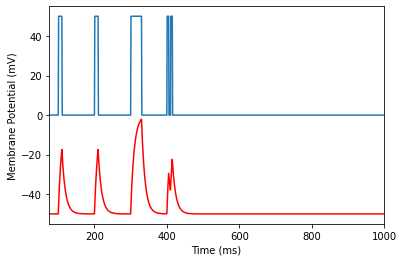

In [135]:
def pulse_current(t, lvl=50):
  thresholds = [0,100,110,200,210]
  levels = [0,40,0,40,0]

  if t <= 100:
    return 0
  elif t > 100 and t <= 110:
    return lvl
  elif t > 200 and t <= 210:
    return lvl
  elif t > 300 and t <= 330:
    return lvl
  elif t > 400 and t <= 405:
    return lvl
  elif t > 410 and t <= 415:
    return lvl
  else:
    return 0
  

I = []
T = []
for t in np.arange(0, duration, step=1):
  T.append(t)
  I.append(pulse_current(t))

t, u_res = u_numsim(pulse_current, duration=duration, dt=dt)
plt.xlim([75, 1000])
plt.plot(t, u_res, color="red")
plt.plot(T, I)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.show()